In [16]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from random import uniform

In [28]:
class Adaline:

    def __init__(self, n_entradas, bias=None, alfa=0.1):
        self.pesos_sinapticos = np.random.uniform(
            low=-0.05, high=0.05, size=(n_entradas,))
        self.n_entradas = n_entradas
        self.bias = bias if bias is not None else uniform(0,0.1)
        self.alfa = alfa

    def calcular(self, estimulo):
        y = np.dot(self.pesos_sinapticos, estimulo)
        y += self.bias
        self.y = self.lineal(y)
        return self.y

    def entrenar_estocastico(self, estimulo, resultado_esperado):
        """
            LMS Estocastico
        """
        self.calcular(estimulo)
        error = (resultado_esperado - self.y)
        delta = (self.alfa * error) * estimulo
        
        # Actualizacion
        self.pesos_sinapticos = self.pesos_sinapticos + delta
        self.bias = self.bias + error * self.alfa
        return self.pesos_sinapticos

    def entrenar_batch(self, estimulos, resultados_esperados):
        """
            LMS Batch
        """
        delta = np.zeros(self.n_entradas)
        for estimulo, respuesta in zip(estimulos, resultados_esperados):
            self.calcular(estimulo)
            error = (respuesta - self.y)
            delta += error * estimulo
            self.bias += error * self.alfa
        self.pesos_sinapticos = self.pesos_sinapticos + self.alfa * delta

    # Por seguir con el algoritmo
    def lineal(self, a):
        """
            Funcion de transferencia lineal
        """
        return a

    def describir(self):
        print("PESOS SINAPTICOS: ", self.pesos_sinapticos)
        print("BIAS: ", self.bias)
        print("RESPUESTA: ", self.y)


#### Vemos que grafica genera los puntos dados
Esto con el fin de tener una nocion del grado de la funcion a aproximar

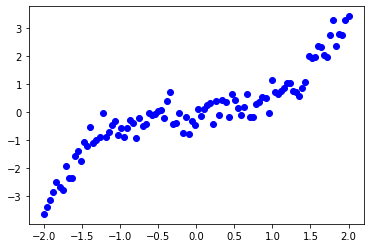

In [2]:
X = np.array([])
Y = np.array([])

with open('datosT3.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',', quoting=csv.QUOTE_NONNUMERIC)
    for row in csv_reader:
        X = np.append(X, [row[0]])
        Y = np.append(Y, [row[1]])
        
plt.plot(X,Y, 'bo')
plt.show()

#### Definimos tres funciones
La primera para entrenar a la neurona
Recibe el Vector de puntos en X y el vector de puntos en Y

La segunda es para graficar la funcion segun una serie de puntos en X

la tercera para ver el error cuadratico medio de la neurona

In [21]:
def entrenar_neurona(adaline, X, Y):
    for i, j in zip(X,Y):
        datosX = []
        for k in range(1,adaline.n_entradas+1):
            datosX.append(i**k)
            
#         print(datosX, j)
        adaline.entrenar_estocastico(np.array(datosX), j)

In [22]:
def graficar_funcion(adaline):
    grafX = []
    grafY = []
    for x in np.arange(-2,2,0.1):
        datosX = []
        for n in range(1,adaline.n_entradas+1):
            datosX.append(x**n)
        y = adaline.calcular(np.array(datosX))
        
        grafX.append(x)
        grafY.append(y)
        
#     print(grafX,grafY)
    plt.plot(X,Y, 'bo', grafX, grafY, 'r-')
    plt.show()

In [50]:
 def error_cuadratico_medio(adaline):
        sigma = 0
        for i, j in zip(X,Y):
            datosX = []
            for k in range(1,adaline.n_entradas+1):
                datosX.append(i**k)
            adaline.calcular(np.array(datosX))
            error = (j - adaline.y)
            sigma += error**2
            
        sigma/=2
        return sigma

In [51]:
adaline = Adaline(3, 0, 0.001)

In [52]:
for i in range(100):
    entrenar_neurona(adaline, X, Y)

PESOS SINAPTICOS:  [0.13018261 0.01890923 0.39603469]
BIAS:  -0.015782051133746474
RESPUESTA:  3.4953902541050215


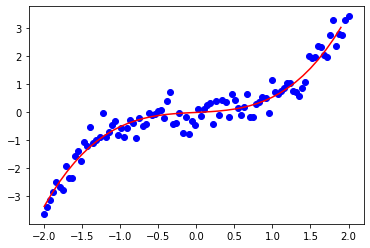

5.550325500934062

In [53]:
adaline.describir()
graficar_funcion(adaline)
error_cuadratico_medio(adaline)

PESOS SINAPTICOS:  [0.15695267 0.05923192 0.36282439]
BIAS:  -0.042811521451297685
RESPUESTA:  3.3897439995980845


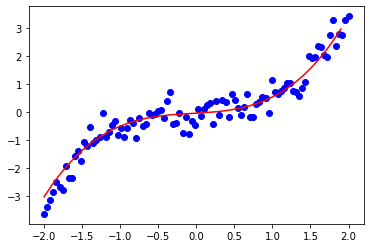

6.111889458861975

In [56]:
ada2 = Adaline(3,0,0.01)
for i in range(100):
    entrenar_neurona(ada2, X, Y)
ada2.describir()
graficar_funcion(ada2)
error_cuadratico_medio(ada2)

PESOS SINAPTICOS:  [0.12557126 0.00572428 0.40152262]
BIAS:  0.008003454076626485
RESPUESTA:  3.4949092811104245


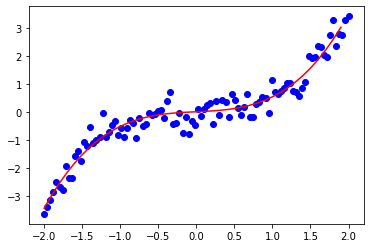

5.555061541191639

In [57]:
ada25 = Adaline(3,0,0.0001)
for i in range(100):
    entrenar_neurona(ada25, X, Y)
ada25.describir()
graficar_funcion(ada25)
error_cuadratico_medio(ada25)

PESOS SINAPTICOS:  [ 1.49769102  2.86243363 -0.486296   -1.52733591]
BIAS:  -0.6198208022297176
RESPUESTA:  10.848634792174648


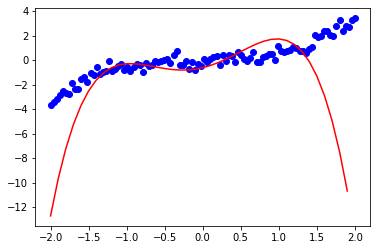

913.9674008833546

In [55]:
ada3 = Adaline(4,0,0.01)
for i in range(100):
    entrenar_neurona(ada3, X, Y)
ada3.describir()
graficar_funcion(ada3)
error_cuadratico_medio(ada3)

PESOS SINAPTICOS:  [ 0.29068377  0.12069861  0.20026056 -0.03651819  0.04153606]
BIAS:  -0.04201377826820124
RESPUESTA:  3.538147661737447


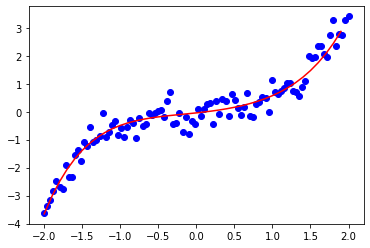

5.494954031056187

In [54]:
ada4 = Adaline(5,0,0.001)
for i in range(100):
    entrenar_neurona(ada4, X, Y)
ada4.describir()
graficar_funcion(ada4)
error_cuadratico_medio(ada4)

### Conclusiones

Visualmente podemos pensar que se trata de una funcion de grado 3, al probrar 
con una neurona que tiene 3 entradas mas el sesgo, vemos que efectivamente interpola con
los puntos dados de entrenamiento.

Vemos que una neurona con 3 entradas basta, ahora, con respecto a la tasa de aprendizaje vemos que mientras mas pequeno el error cuadratico medio baja, sin embargo ya para una tasa de aprendizaje de 0.0001, el error cuadratico se mantiene.

Por otro lado, si aumentado el tamano de la entrada obtenemos resultados esperados, si tratamos aproximar a una funcion de grado par el error cuadratico medio se incrementa mucho, por lo que no es una buena opcion independientemente de la los pesos sinapticos, la tasa de aprendizaje o el sesgo.

Si aumentamos los paramentros de entrada a un numero impar vemos que si aproxima bien, inclusive baja el error cuadratico medio, casi insignificablemente, quizas podria bajar ese error si se probara con unas tasas de aprendizaje menor o aumentando los parametros de entrada, siempre y cuando sea tamano impar.